# PCA on WINE Dataset

## Business Statement

Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).

### Lets import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('wine.csv')
df.shape

(178, 14)

In [4]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

<AxesSubplot:>

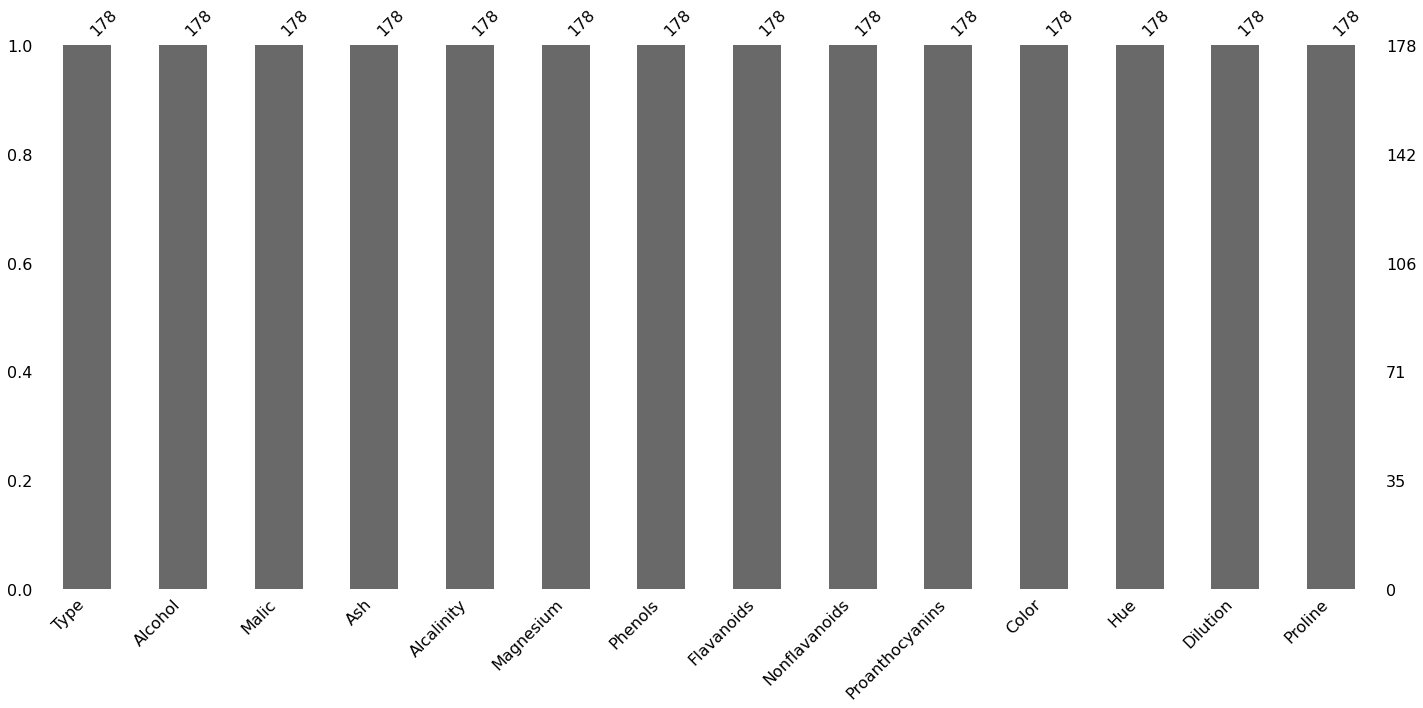

In [5]:
msno.bar(df) # To check missing value in each row visually

In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Lets Analyze our data

In [7]:
data = df.copy()

In [8]:
plt.rcParams['figure.figsize']=(15,10)

<AxesSubplot:>

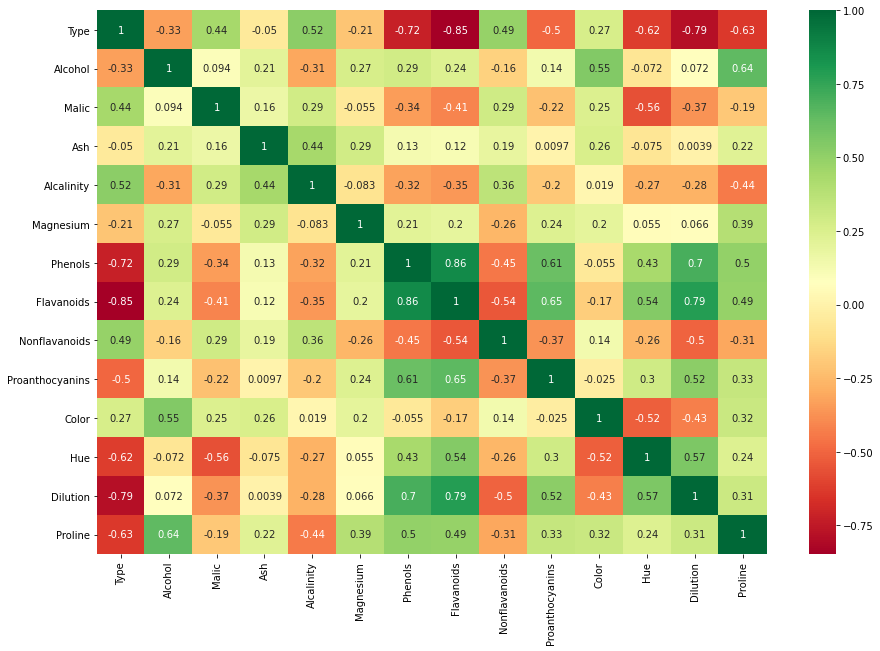

In [12]:
sns.heatmap(df.corr(), cmap='RdYlGn',annot=True)

<AxesSubplot:title={'center':'Box plot of Wine Dataset'}>

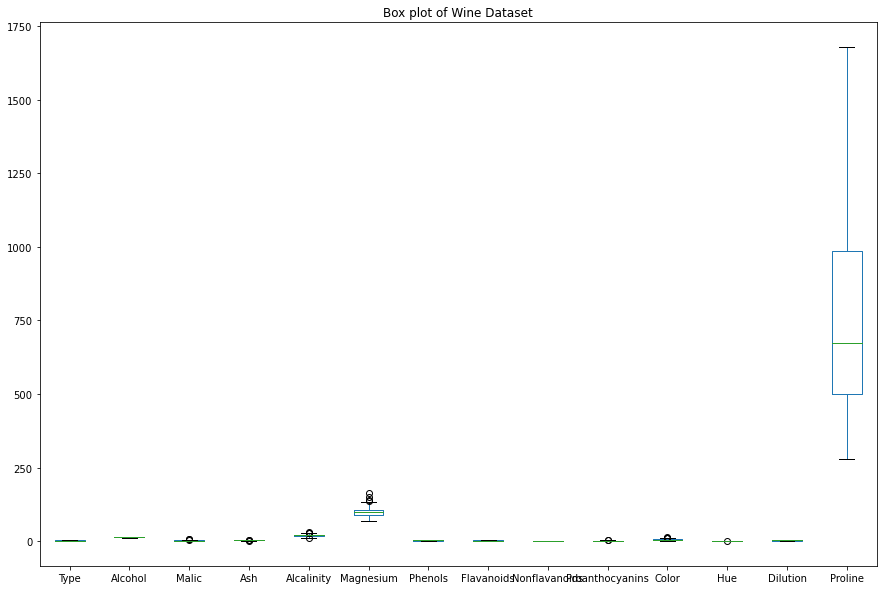

In [13]:
data.plot(kind='box', title="Box plot of Wine Dataset")

It looks like there are some outliers in our dataset

Lets check the count of Outliers by columns

In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
outliers.sum()

Type               0
Alcohol            0
Malic              3
Ash                3
Alcalinity         4
Magnesium          4
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    2
Color              4
Hue                1
Dilution           0
Proline            0
dtype: int64

Since there are outliers in the dataset, lets replace them with their respective IQR values

We will use Winsorizer method

In [16]:
from feature_engine.outliers import Winsorizer

In [17]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [20]:
winsor = Winsorizer(capping_method='iqr',
                   tail='both',
                   fold = 1.5,
                   variables=['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'])
df_t = winsor.fit_transform(data[['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline']])

<AxesSubplot:>

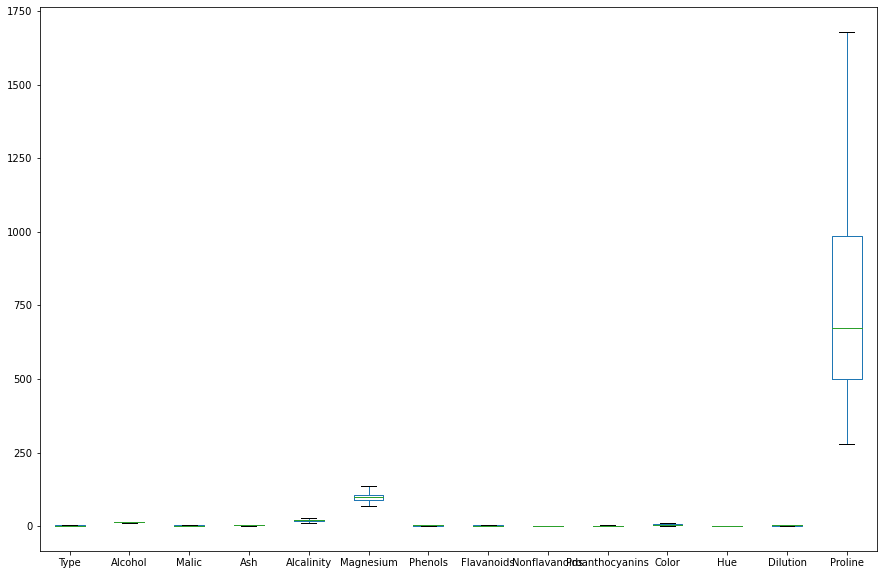

In [21]:
df_t.plot(kind='box')

In [22]:
df_t.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.330435,2.366721,19.478090,99.483146,2.295112,2.029270,0.361854,1.586067,5.038146,0.956979,2.611685,746.893258
std,0.775035,0.811827,1.100173,0.263705,3.287757,13.414186,0.625851,0.998859,0.124453,0.558153,2.260881,0.227095,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.688750,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.302500,3.078750,27.950000,135.500000,3.880000,5.080000,0.660000,3.000000,10.670000,1.626250,4.000000,1680.000000


In [23]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Lets check whether post transformation do we see any outliers in our dataset

In [24]:
Q1 = df_t.quantile(0.25)
Q3 = df_t.quantile(0.75)

IQR = Q3 - Q1

outliers = (df_t < (Q1 - 1.5 * IQR)) | (df_t > (Q3 + 1.5 * IQR))
outliers.sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Now we have replaced outliers with their IQR values, one more thing we need to do is Transform our data. We would need to normalize our data (bringing values between 0 and 1). This is required as range of each column is different

In [41]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return(x)

df_norm = df_t.copy()
df_norm = norm_func(df_norm)
df_norm.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.0,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.0,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933
3,0.0,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347
4,0.0,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963


<AxesSubplot:title={'center':'KDE Plot of Wine Data in Normalized Format'}, ylabel='Density'>

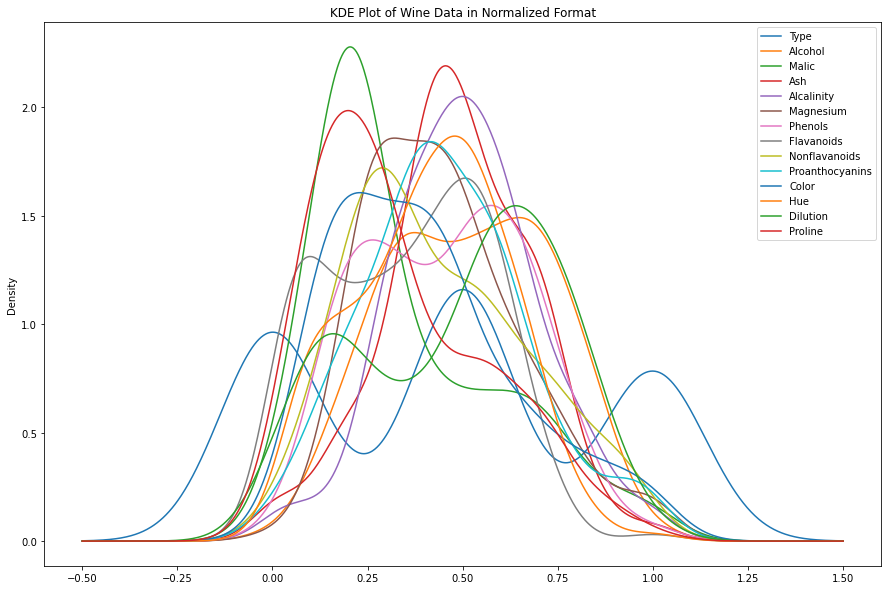

In [28]:
df_norm.plot(kind='kde', title = 'KDE Plot of Wine Data in Normalized Format')

## Lets cluster our data using H-Clustering

In [29]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

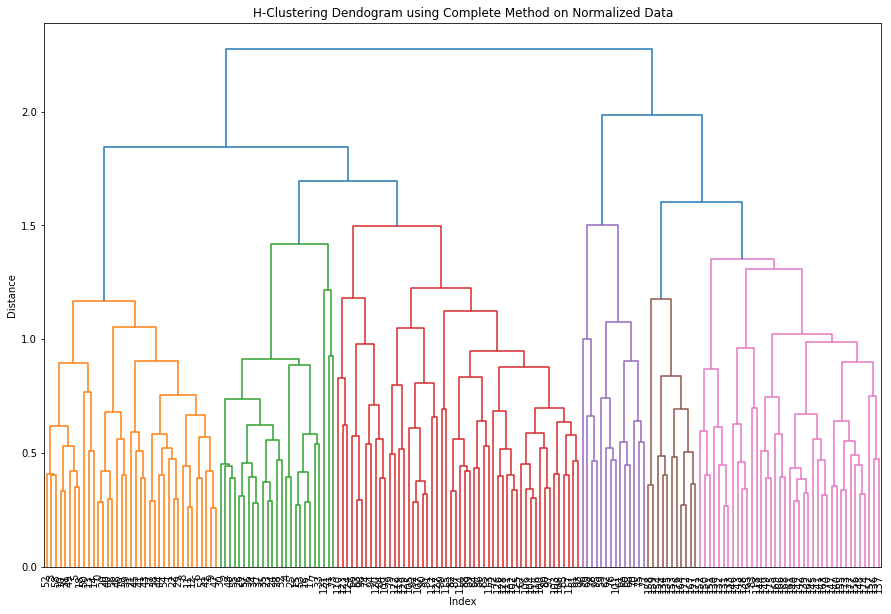

In [33]:
z_comp = linkage(df_norm, method = 'complete', metric='euclidean')
plt.title("H-Clustering Dendogram using Complete Method on Normalized Data")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z_comp, leaf_rotation=90,
             leaf_font_size=10)
plt.show()

From above visual we can classify our data into (4,5 or 6) clusters

Lets use Ward method and see if we are getting simialar results

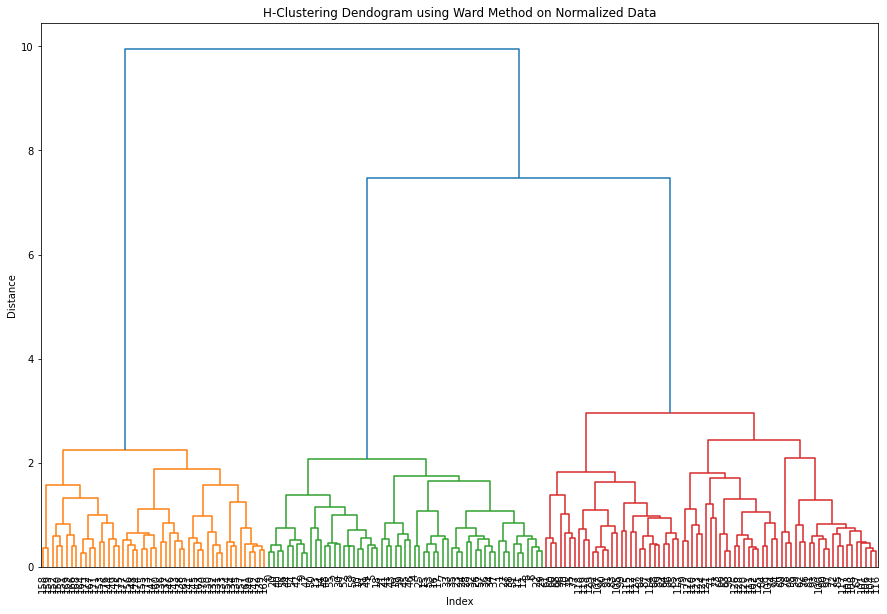

In [34]:
z_ward = linkage(df_norm, method = 'ward', metric='euclidean')
plt.title("H-Clustering Dendogram using Ward Method on Normalized Data")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=90,
             leaf_font_size=10)
plt.show()

Lets remove Type column from our df_norm

In [43]:
df2 = df_norm.drop(columns='Type')
df2.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933
3,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347
4,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963


Lets make our H-Clustering on new dataframe  - df2

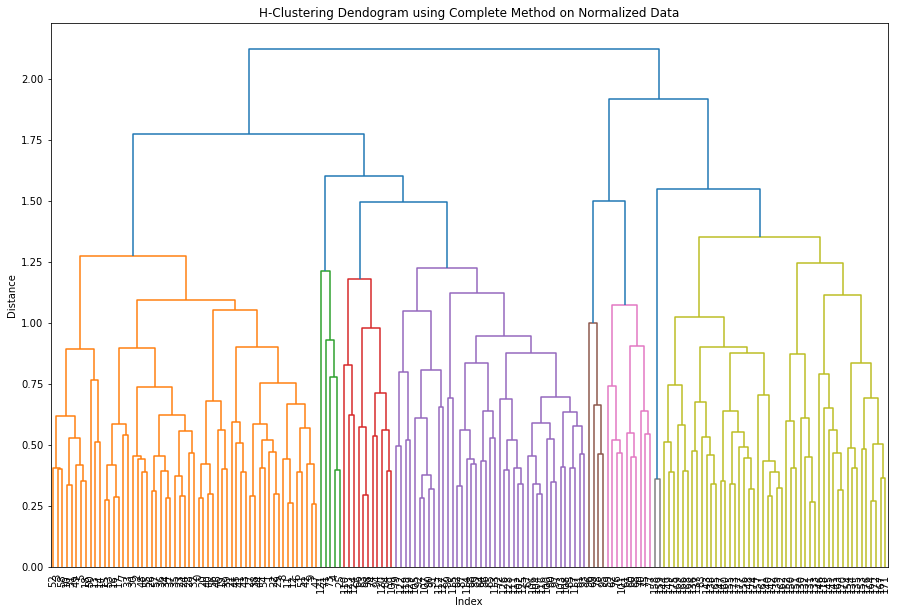

In [45]:
z_comp = linkage(df2, method = 'complete', metric='euclidean')
plt.title("H-Clustering Dendogram using Complete Method on Normalized Data")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z_comp, leaf_rotation=90,
             leaf_font_size=10)
plt.show()

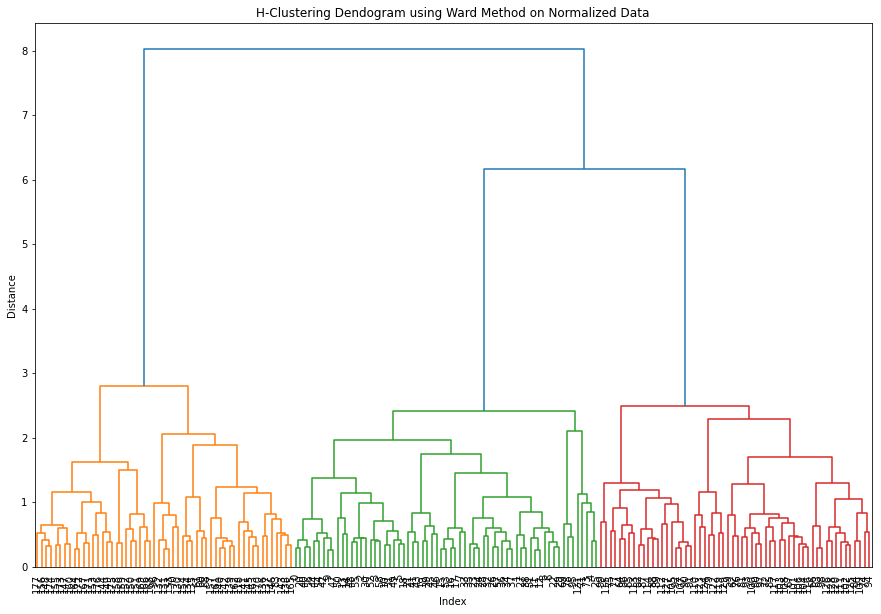

In [46]:
z_ward = linkage(df2, method = 'ward', metric='euclidean')
plt.title("H-Clustering Dendogram using Ward Method on Normalized Data")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=90,
             leaf_font_size=10)
plt.show()

Looks like we can cluster it well with Ward method

In [47]:
h_ward1 = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean').fit(df2)
h_ward1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [48]:
cluster_labels = pd.Series(h_ward1.labels_)
cluster_data = data.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [49]:
cluster_data1 = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()
cluster_data1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,2.872727,13.083818,3.171636,2.416182,21.058182,99.636364,1.693818,0.839273,0.449818,1.132545,6.926545,0.716655,1.712909,627.218182
1,2.000000,12.209310,1.963276,2.225345,20.217241,89.775862,2.277931,2.118276,0.359655,1.630862,2.959138,1.056034,2.862069,488.931034
2,1.092308,13.636308,1.962462,2.450462,17.527692,108.723077,2.819231,2.956769,0.289385,1.943077,5.350000,1.073231,3.148769,1078.338462


Lets apply clustering using Complete metod with 5 clusters on df_norm dataset

In [50]:
h_comp1 = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean').fit(df_norm)
h_comp1.labels_

array([3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 4, 1, 4, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [51]:
cluster_labels = pd.Series(h_comp1.labels_)
cluster_data = data.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [52]:
cluster_data2 = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()
cluster_data2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,2.96,13.144000,3.346200,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000
1,2.00,12.172500,2.012885,2.269808,20.682692,89.269231,2.332885,2.196538,0.364615,1.702500,2.930385,1.049038,2.919423,487.038462
2,2.00,12.470714,1.430714,2.039286,17.100000,111.571429,1.882857,1.417857,0.352143,1.362143,3.274286,1.093286,2.247857,629.428571
3,1.00,13.860811,2.100541,2.337568,15.867568,104.891892,2.895946,3.067027,0.263514,1.965135,5.752703,1.034324,3.229730,1128.567568
4,1.12,13.460000,1.845600,2.675600,20.064000,109.480000,2.794000,2.932400,0.330000,1.802000,5.042000,1.119600,3.086400,1037.200000


In [53]:
# with 6 clusters
h_comp1 = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='euclidean').fit(df_norm)
h_comp1.labels_

array([3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 4, 1, 4, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5,
       5, 2, 2, 2, 5, 5, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 5, 5, 2, 2, 2,
       5, 2], dtype=int64)

In [54]:
cluster_labels = pd.Series(h_comp1.labels_)
cluster_data = data.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,5


In [55]:
cluster_data2 = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()
cluster_data2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,2.000000,12.470714,1.430714,2.039286,17.100000,111.571429,1.882857,1.417857,0.352143,1.362143,3.274286,1.093286,2.247857,629.428571
1,2.000000,12.172500,2.012885,2.269808,20.682692,89.269231,2.332885,2.196538,0.364615,1.702500,2.930385,1.049038,2.919423,487.038462
2,2.948718,13.122051,3.642308,2.445641,21.628205,99.743590,1.641282,0.822051,0.431795,1.077692,6.642564,0.701026,1.709231,613.128205
3,1.000000,13.860811,2.100541,2.337568,15.867568,104.891892,2.895946,3.067027,0.263514,1.965135,5.752703,1.034324,3.229730,1128.567568
4,1.120000,13.460000,1.845600,2.675600,20.064000,109.480000,2.794000,2.932400,0.330000,1.802000,5.042000,1.119600,3.086400,1037.200000
5,3.000000,13.221818,2.296364,2.354545,20.272727,94.727273,1.804545,0.753636,0.516364,1.435455,9.469091,0.633636,1.661818,655.454545


Lets Cluster with Ward method using df_norm dataset

In [56]:
h_ward2 = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean').fit(df_norm)
h_ward2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [57]:
cluster_labels = pd.Series(h_ward2.labels_)
cluster_data = data.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [58]:
cluster_data2 = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()
cluster_data2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
1,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833
2,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864


### FROm the above clustering examples we can cluster our data with 3 clusters using WARD method

# Lets Use K-Means Clustering and see how we can cluster our data

We already have normalized our data

In [59]:
df_norm

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.0,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.0,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933
3,0.0,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347
4,0.0,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,1.000000,0.547662,0.566860,0.381679,0.241379,0.056962,0.735849,0.250965,0.683706,0.139586,0.172161,0.329529
174,1.0,0.623684,0.694795,0.569245,0.712209,0.488550,0.282759,0.086498,0.566038,0.386100,0.641108,0.191930,0.106227,0.336662
175,1.0,0.589474,0.775890,0.410971,0.537791,0.763359,0.210345,0.073840,0.566038,0.362934,0.949947,0.095965,0.106227,0.397290
176,1.0,0.563158,0.405479,0.490108,0.537791,0.763359,0.231034,0.071730,0.754717,0.405405,0.854100,0.104689,0.128205,0.400856


Lets import necessary libraries

In [61]:
from sklearn.cluster import KMeans
from kneed import KneeLocatorocator

Text(0, 0.5, 'Total Within SS')

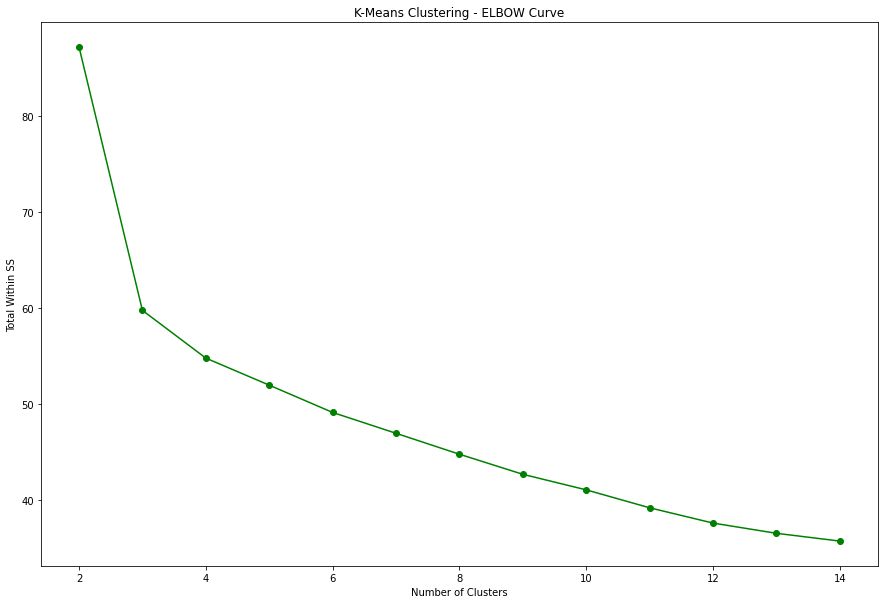

In [62]:
TWSS = []
k=list(range(2,15))

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
plt.plot(k,TWSS, 'go-')
plt.title("K-Means Clustering - ELBOW Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('Total Within SS')

In [63]:
kl = KneeLocator(range(2,15), TWSS, curve='convex', direction='decreasing')
kl.elbow

4

Based on the visual it looks like 3 however with KneeLocator it says 4, lets cluster our data with 3 and 4 clusters and see the results

In [68]:
model1 = KMeans(n_clusters=3)
model1.fit(df_norm)
model1.labels_
cluster_labels = pd.Series(model1.labels_)
cluster_data1 = data.copy()
cluster_data1['Clust'] = cluster_labels
cluster_data1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [69]:
cluster3 = cluster_data1.iloc[:,:-1].groupby(cluster_data1.Clust).mean()
cluster3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust,,,,,,,,,,,,,,
0,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333
1,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
2,2.000000,12.257246,1.908551,2.238551,20.063768,94.043478,2.252609,2.076232,0.362319,1.625652,3.057971,1.055739,2.786232,512.826087


In [70]:
model2 = KMeans(n_clusters=4)
model2.fit(df_norm)
model2.labels_
cluster_labels = pd.Series(model2.labels_)
cluster_data2 = data.copy()
cluster_data2['Clust'] = cluster_labels
cluster_data2.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3


In [71]:
cluster4 = cluster_data2.iloc[:,:-1].groupby(cluster_data2.Clust).mean()
cluster4

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust,,,,,,,,,,,,,,
0,2.0,12.293590,1.946410,2.214103,19.997436,98.282051,2.553846,2.451795,0.290000,1.932051,3.146410,1.047949,3.036923,522.871795
1,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833
2,2.0,12.260625,1.915937,2.282188,20.531250,90.000000,1.899375,1.628750,0.453437,1.262500,3.013750,1.066437,2.478750,515.406250
3,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864


## Based on the both the results what we can see is 3 clusters seems to be the way ahead

Lets Apply PCA on the following data to see the impact it has on clusters

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [76]:
df_norm # We already have our data normalized
df_pca = df_norm.copy()

In [89]:
pca = PCA(n_components=7)
pca_values = pca.fit_transform(df_pca)

In [90]:
var = pca.explained_variance_ratio_
var

array([0.47326307, 0.16205567, 0.07353403, 0.06055371, 0.05489691,
       0.04657832, 0.03211263])

In [91]:
pca.components_

array([[ 0.61405581, -0.10840495,  0.2065451 , -0.00372894,  0.16589612,
        -0.08882562, -0.2920096 , -0.31765211,  0.23411993, -0.2235928 ,
         0.09969902, -0.21526659, -0.36348198, -0.23177669],
       [ 0.02270678, -0.47331563, -0.22862544, -0.22979163,  0.05371397,
        -0.2827905 , -0.07278868, -0.00988795, -0.00622622, -0.04588173,
        -0.5843597 ,  0.22916914,  0.1883129 , -0.38798314],
       [-0.00206175, -0.13940444,  0.34115939,  0.55639182,  0.53841736,
         0.09908233,  0.18786102,  0.16049988,  0.24028623,  0.20694636,
        -0.12225039, -0.01750209,  0.24565913, -0.13294309],
       [ 0.24611869, -0.07341834,  0.37476844, -0.29584438, -0.02763853,
         0.00764911,  0.14191207,  0.11048433, -0.6027398 ,  0.36434625,
         0.06705002, -0.31229106,  0.16075119, -0.22132786],
       [ 0.28265963, -0.22325618, -0.61339672,  0.16516899,  0.20790576,
         0.51671809,  0.04076216,  0.02808663, -0.27973941,  0.15042222,
         0.13029658,  0.09

In [92]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([47.33, 63.54, 70.89, 76.95, 82.44, 87.1 , 90.31])

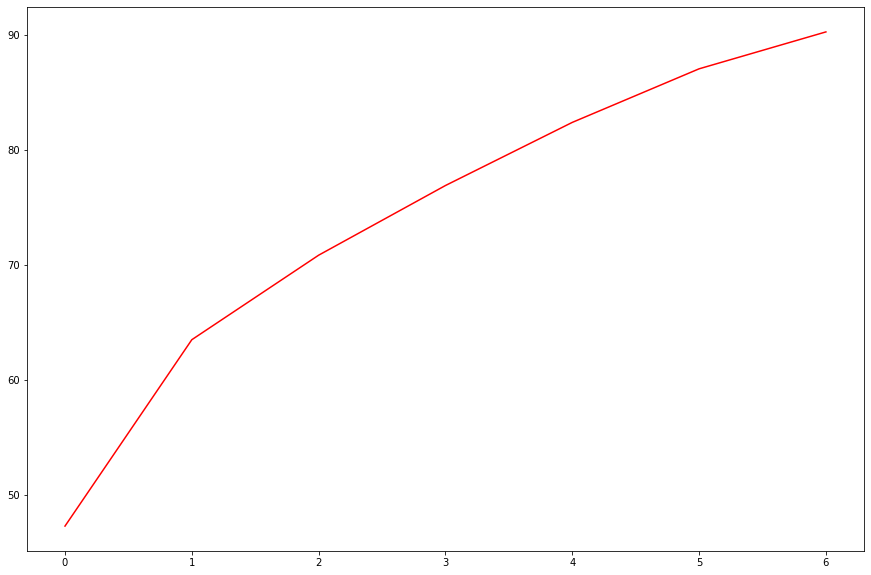

In [93]:
plt.plot(var1, color='red')

In [94]:
pca_values

array([[-0.87892817, -0.31903604,  0.02023598, ...,  0.08231417,
        -0.10197118,  0.13657534],
       [-0.68139659,  0.0277327 , -0.37016538, ..., -0.2045907 ,
        -0.1487729 , -0.01361819],
       [-0.72122454, -0.23563981,  0.23621583, ..., -0.02072575,
         0.14698501,  0.10527806],
       ...,
       [ 0.84448888, -0.65615391, -0.10412659, ...,  0.06241162,
        -0.08748106,  0.21606938],
       [ 0.77959688, -0.52104305, -0.10863222, ...,  0.24757188,
         0.08305134,  0.22330923],
       [ 0.91864776, -0.58406137,  0.28105671, ..., -0.11081418,
         0.18115883, -0.07904489]])

In [96]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5", "comp6"
final = pd.concat([df_pca, pca_data.iloc[:, 0:]], axis = 1)

In [97]:
final

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,...,Hue,Dilution,Proline,comp0,comp1,comp2,comp3,comp4,comp5,comp6
0,0.0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,...,0.488550,0.970696,0.561341,-0.878928,-0.319036,0.020236,0.055150,0.082314,-0.101971,0.136575
1,0.0,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,...,0.497274,0.780220,0.550642,-0.681397,0.027733,-0.370165,-0.027201,-0.204591,-0.148773,-0.013618
2,0.0,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,...,0.479826,0.695971,0.646933,-0.721225,-0.235640,0.236216,0.064782,-0.020726,0.146985,0.105278
3,0.0,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,...,0.331516,0.798535,0.857347,-0.933694,-0.638388,0.026089,0.116392,0.018552,0.121240,-0.088255
4,0.0,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,...,0.488550,0.608059,0.325963,-0.461426,-0.143855,0.413084,-0.172277,0.030558,-0.183298,0.083673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,1.000000,0.547662,0.566860,0.381679,0.241379,0.056962,0.735849,0.250965,...,0.139586,0.172161,0.329529,0.933337,-0.477839,0.087820,0.079286,-0.371887,-0.063295,0.070432
174,1.0,0.623684,0.694795,0.569245,0.712209,0.488550,0.282759,0.086498,0.566038,0.386100,...,0.191930,0.106227,0.336662,0.809042,-0.383564,0.082747,0.090652,0.002581,-0.018329,0.032511
175,1.0,0.589474,0.775890,0.410971,0.537791,0.763359,0.210345,0.073840,0.566038,0.362934,...,0.095965,0.106227,0.397290,0.844489,-0.656154,-0.104127,0.194446,0.062412,-0.087481,0.216069
176,1.0,0.563158,0.405479,0.490108,0.537791,0.763359,0.231034,0.071730,0.754717,0.405405,...,0.104689,0.128205,0.400856,0.779597,-0.521043,-0.108632,-0.067807,0.247572,0.083051,0.223309


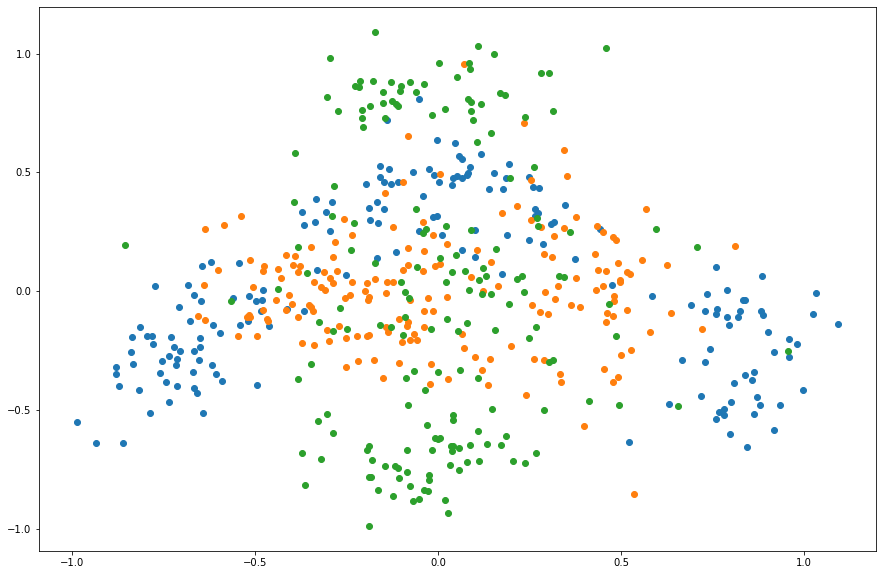

In [88]:
plt.scatter(x = final.comp0, y = final.comp1)
plt.scatter(x = final.comp1, y = final.comp2)
plt.scatter(x = final.comp2, y = final.comp0)

In [105]:
pca_data1 = pca_data[['comp1','comp2','comp3']]
pca_data1

,comp1,comp2,comp3
0,-0.319036,0.020236,0.055150
1,0.027733,-0.370165,-0.027201
2,-0.235640,0.236216,0.064782
3,-0.638388,0.026089,0.116392
4,-0.143855,0.413084,-0.172277
...,...,...,...
173,-0.477839,0.087820,0.079286
174,-0.383564,0.082747,0.090652
175,-0.656154,-0.104127,0.194446
176,-0.521043,-0.108632,-0.067807


## With 3 PCAs we are getting around 71% of the data

## Lets Apply H-Clust and K-Means on pca_data1

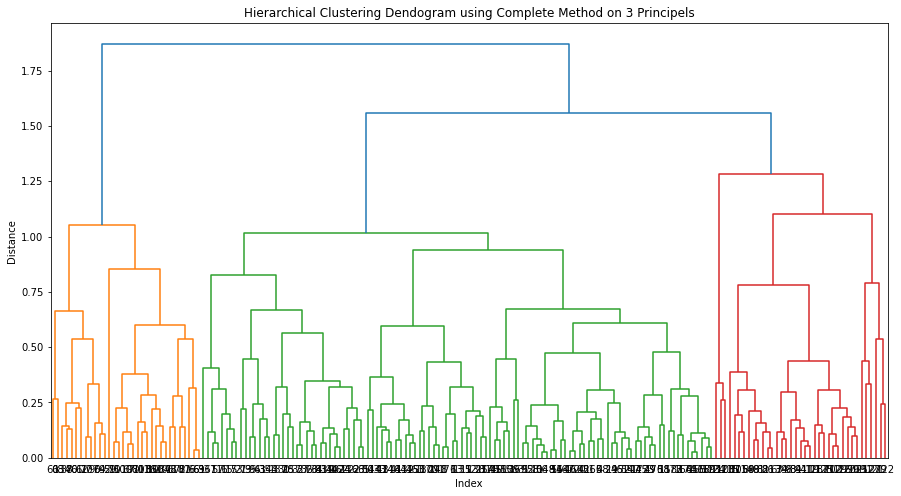

In [106]:
z_comp = linkage(pca_data1, method = 'complete', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Complete Method on 3 Principels");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_comp, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

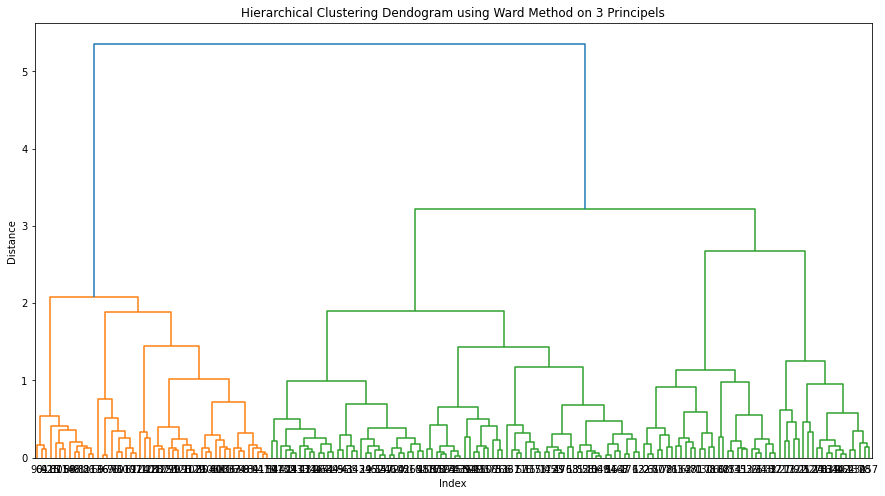

In [108]:
z_ward = linkage(pca_data1, method = 'ward', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Ward Method on 3 Principels");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

In [109]:
h_ward1 = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean').fit(pca_data1)
h_ward1.labels_

array([2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [110]:
cluster_labels = pd.Series(h_ward1.labels_)
cluster_data = data.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [111]:
cluster_data2 = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()
cluster_data2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,1.877551,12.926939,2.246939,2.460408,19.991837,100.836735,2.176735,1.911224,0.417143,1.386531,4.358163,0.999714,2.542041,764.489796
1,2.000000,12.174600,1.857800,2.184600,19.940000,89.700000,2.326200,2.123200,0.340800,1.686000,2.888400,1.063600,2.908400,482.060000
2,1.936709,13.569114,2.694684,2.423418,18.905063,105.417722,2.348861,2.043038,0.340886,1.657468,6.865443,0.864051,2.467089,903.594937


Lets Cluster using Complete method on PCA Data

In [112]:
h_comp1 = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean').fit(pca_data1)
h_comp1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [115]:
cluster_labels = pd.Series(h_comp1.labels_)
cluster_data = data.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [116]:
cluster_data2 = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()
cluster_data2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,1.972973,12.109730,2.257568,2.413784,21.851351,91.864865,2.490270,2.380270,0.371622,1.780270,2.893243,1.030541,2.986216,488.297297
1,2.000000,12.489688,1.503125,2.038125,17.978125,93.843750,1.993750,1.724375,0.367812,1.372500,3.343125,1.077375,2.561563,549.312500
2,1.908257,13.453028,2.607706,2.446881,19.140367,104.146789,2.317339,1.999633,0.356789,1.590734,6.296422,0.897431,2.499266,892.678899


## Lets Cluster using K-Means

Text(0, 0.5, 'Total Within SS')

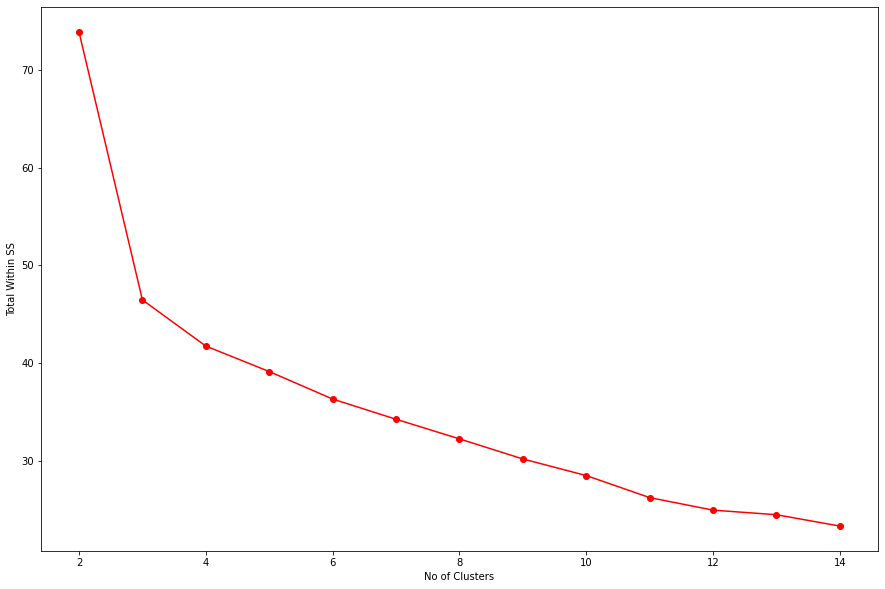

In [117]:
TWSS = []
k=list(range(2,15))

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_data)
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS, 'ro-');plt.xlabel("No of Clusters");plt.ylabel('Total Within SS')

In [118]:
kl = KneeLocator(range(2,15), TWSS, curve='convex', direction='decreasing')
kl.elbow

4

In [119]:
model2 = KMeans(n_clusters=4)
model2.fit(pca_data)
model2.labels_
cluster_labels = pd.Series(model2.labels_)
cluster_data2 = data.copy()
cluster_data2['Clust'] = cluster_labels
cluster_data2.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3


In [120]:
cluster4 = cluster_data2.iloc[:,:-1].groupby(cluster_data2.Clust).mean()
cluster4

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust,,,,,,,,,,,,,,
0,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833
1,2.0,12.296750,2.008500,2.227000,20.160000,98.375000,2.545000,2.443750,0.293500,1.926500,3.119750,1.044750,3.039000,518.925000
2,2.0,12.255484,1.834839,2.267742,20.338710,89.612903,1.889677,1.612581,0.454194,1.248065,3.043871,1.071161,2.458065,520.258065
3,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864



We can perform better clustering with Original data, however when we apply PCA with 3 components along with H-Clustering does not provide better clustering options

With K-Means and PCA we can still perform clustering using PCA with 3 principals. which was around 71% of the data